In [49]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

In [50]:
## 한글설정
path = 'C:/Users/jaemi/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [51]:
df = pd.read_excel('./시도_초혼연령별_혼인_20230515053319.xlsx', )
df.head(10)

,시도별,연령별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,시도별,연령별,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,256372,249978,238054,232446,222496,216759,216306,210316,199456,193894,180059,175033,161207,156476,160089,155966
2,NaN,15세 미만,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,15 - 19세,921,3389,795,3253,569,2741,464,2614,378,2572,278,1460,223,798,207,1006
4,NaN,20 - 24세,9360,24551,8333,22173,7664,19645,6612,17756,5729,15381,4823,11950,4143,9536,3983,9629
5,NaN,25 - 29세,65912,106107,59845,97440,56363,91005,54363,87531,49500,79014,45958,72042,40331,61727,36877,57201
6,NaN,30 - 34세,117335,88695,106096,81130,95150,73896,90116,71333,80835,66050,75127,61847,67419,57944,66594,60224
7,NaN,35 - 39세,43045,20756,42770,21706,42531,22503,43266,23644,41184,23126,35642,20513,32074,18956,32758,19559
8,NaN,40 - 44세,14107,4509,13947,4582,13346,4755,13764,4974,13590,5217,11494,4969,10652,5162,12109,5835
9,NaN,45 - 49세,4013,1148,4411,1261,4790,1327,5398,1494,5622,1558,4397,1359,3908,1402,4560,1473


In [52]:
# 전체 여자의 계 계산
total_female = df.iloc[1, 3::2]
print('여자 전체 결혼\n', total_female)
print()
# 20~24세 여자의 데이터 추출
data_20_24_female = df.iloc[4, 3::2]
print('20~24세 여자\n', data_20_24_female)
print()
# 30~34세 여자의 데이터 추출
data_30_34_female = df.iloc[6, 3::2]
print('30~34세 여자\n', data_30_34_female)
print()


여자 전체 결혼
 2015.1    249978
2016.1    232446
2017.1    216759
2018.1    210316
2019.1    193894
2020.1    175033
2021.1    156476
2022.1    155966
Name: 1, dtype: object

20~24세 여자
 2015.1    24551
2016.1    22173
2017.1    19645
2018.1    17756
2019.1    15381
2020.1    11950
2021.1     9536
2022.1     9629
Name: 4, dtype: object

30~34세 여자
 2015.1    88695
2016.1    81130
2017.1    73896
2018.1    71333
2019.1    66050
2020.1    61847
2021.1    57944
2022.1    60224
Name: 6, dtype: object



In [53]:
# 20~24세 여자의 비율 계산
ratio_20_24_female = data_20_24_female / total_female * 100
print('20~24세 여자의 비율 계산\n', ratio_20_24_female)

# 30~34세 여자의 비율 계산
ratio_30_34_female = data_30_34_female / total_female * 100
print('30~34세 여자의 비율 계산\n', ratio_30_34_female)

20~24세 여자의 비율 계산
 2015.1    9.821264
2016.1     9.53899
2017.1    9.063061
2018.1    8.442534
2019.1    7.932685
2020.1    6.827284
2021.1    6.094225
2022.1    6.173781
dtype: object
30~34세 여자의 비율 계산
 2015.1    35.481122
2016.1     34.90273
2017.1    34.091318
2018.1    33.917058
2019.1    34.065005
2020.1     35.33448
2021.1    37.030599
2022.1    38.613544
dtype: object


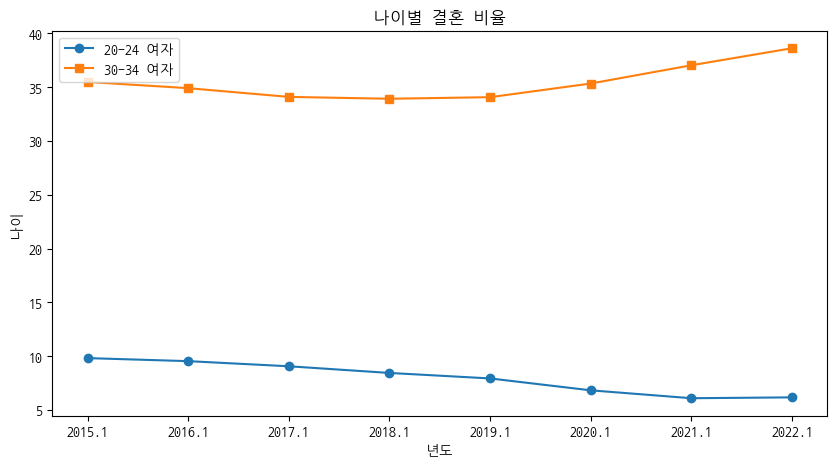

In [58]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# x축 설정
# x_axis = list(range(2015, 2022))

# 20~24세 여자 비율 그래프 그리기
plt.plot(ratio_20_24_female, marker='o', label='20-24 여자')

# 30~34세 여자 비율 그래프 그리기
plt.plot(ratio_30_34_female, marker='s', label='30-34 여자')

# 그래프 타이틀과 레이블 설정
plt.title('나이별 결혼 비율')
plt.xlabel('년도')
plt.ylabel('나이')
plt.legend()

# 그래프 출력
plt.show()

In [66]:
# 전체 여자의 계 계산
total_female = df.iloc[1, 3::2]
# print('여자 전체 결혼\n', total_female)
# print()
# 20대 여자의 데이터 추출
data_20_female = df.iloc[4, 3::2] + df.iloc[5, 3::2]
# print('20대 여자\n', data_20_female)
print()
# 30대 여자의 데이터 추출
data_30_female = df.iloc[6, 3::2] + df.iloc[7, 3::2]
# print('30대 여자\n', data_30_female)
print()

# 20대 여자의 비율 계산
ratio_20_female = data_20_female / total_female * 100
print('20대 여자의 비율 계산\n', ratio_20_female)

# 30대 여자의 비율 계산
ratio_30_female = data_30_female / total_female * 100
print('30대 여자의 비율 계산\n', ratio_30_female)



20대 여자의 비율 계산
 2015.1      52.2678
2016.1    51.458403
2017.1    51.047477
2018.1    50.061336
2019.1    48.683817
2020.1     47.98638
2021.1    45.542447
2022.1    42.849082
dtype: object
30대 여자의 비율 계산
 2015.1    43.784253
2016.1    44.240813
2017.1    44.472894
2018.1    45.159189
2019.1     45.99214
2020.1    47.053984
2021.1    49.144917
2022.1    51.154098
dtype: object


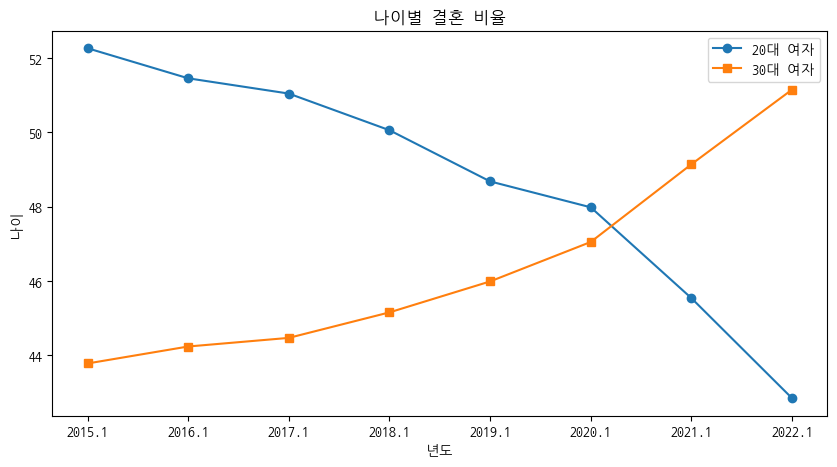

In [67]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 20~24세 여자 비율 그래프 그리기
plt.plot(ratio_20_female, marker='o', label='20대 여자')

# 30~34세 여자 비율 그래프 그리기
plt.plot(ratio_30_female, marker='s', label='30대 여자')

# 그래프 타이틀과 레이블 설정
plt.title('나이별 결혼 비율')
plt.xlabel('년도')
plt.ylabel('나이')
plt.legend()

# 그래프 출력
plt.show()